In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
import pandas as pd #imports the relevant modules
%matplotlib inline 

In [2]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams.update({'font.size': 18}) #updates figure parameters

# DOS

In [7]:
energy, dos, idos = np.loadtxt('./DOS/silicene_dos.dat', unpack=True) #extracts energy, density of states
                                                                      #and integrated density of states from 
                                                                      #output .dat file

In [8]:
fermi_energy = -2.8774 #find in nscf output file
energy -= fermi_energy #shifts energies to set zero-point at Fermi energy

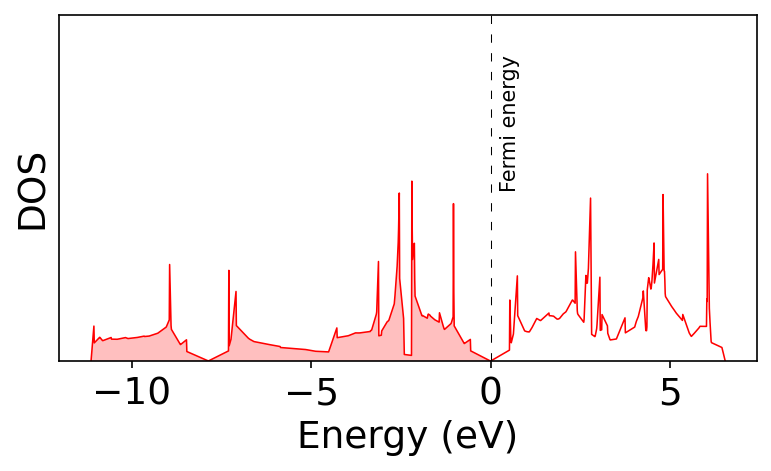

In [108]:
plt.figure(figsize = (6, 3))
plt.plot(energy, dos, linewidth=0.75, color='red') #plots DOS against energy 
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10))) #plots a dashed line at the Fermi level
# plt.xlim(-1, 1)
plt.ylim(0, 10)
plt.fill_between(energy, 0, dos, where=(energy < 0), facecolor='red', alpha=0.25) #fills in between DOS=0 and 
#input density of states data, for all energy values below the Fermi level
plt.text(0.25, 5, 'Fermi energy', fontsize=10, rotation=90)
plt.show() 

# pDOS

## Si(1) s orbital

In [109]:
Energy, lDOS, pDOS_s = np.loadtxt('./pDOS/silicene_pdos.dat.pdos_atm#1(Si)_wfc#1(s)', unpack=True)
Energy -= fermi_energy #loads in pDOS data for s orbital of first silicon atom of unit cell and shifts 
                       #zero-point energy to  Fermi level

In [110]:
df = {'Energy':Energy, 'lDOS':lDOS, 'pDOS_s':pDOS_s}
si_s = pd.DataFrame(df) #creates dataframe containing all data, lDOS and pDOS are the same because 
                        #there is only one s orbital per subshell

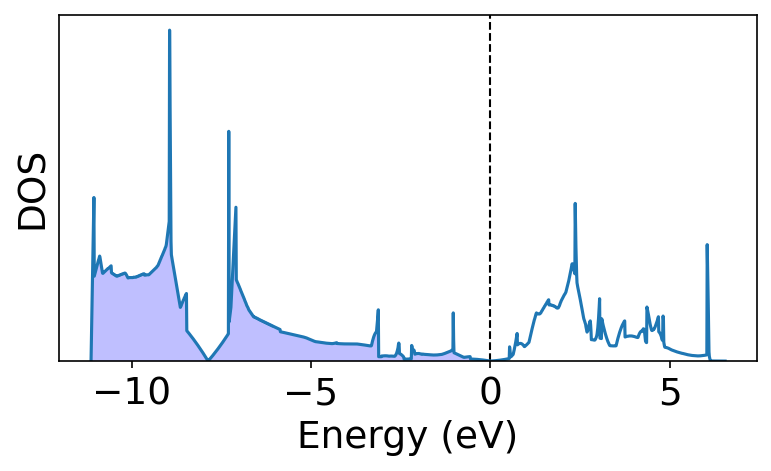

In [111]:
plt.figure(figsize=(6,3))
# plt.xlim(-16, 8)
plt.ylim(0, 1)
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.axvline(x=0, linewidth=1, ls='--', c='k')
plt.fill_between(si_s['Energy'], 0, si_s['lDOS'], where=(si_s['Energy'] < 0), facecolor='blue', alpha=0.25)
plt.plot(si_s['Energy'], si_s['lDOS'])

## Si(1) p orbitals

In [122]:
Energy, lDOS, pDOS_pz, pDOS_px, pDOS_py = np.loadtxt('./pDOS/silicene_pdos.dat.pdos_atm#1(Si)_wfc#2(p)', unpack=True)
Energy -= fermi_energy #loads in pDOS data for p orbitals of first silicon atom, order of p orbitals 
#hard-coded into projwfc calculation, lDOS gives sum of pDOS values for all orbitals of the p subshell

In [114]:
df = {'Energy':Energy, 'lDOS':lDOS, 'pDOS_pz':pDOS_pz, 'pDOS_px':pDOS_px, 'pDOS_py':pDOS_py}
si_p = pd.DataFrame(df)

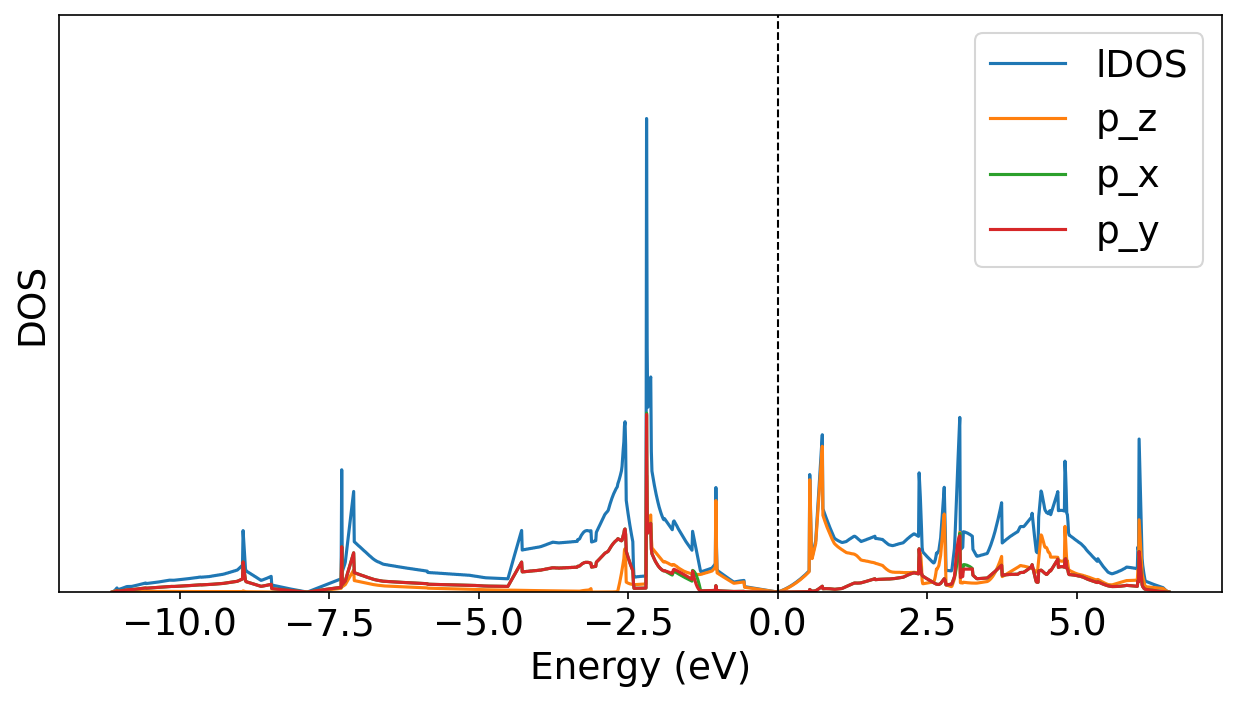

In [115]:
plt.figure(figsize=(10,5))
# plt.xlim(-16, 8)
plt.ylim(0, 4)
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.plot(si_p['Energy'], si_p['lDOS'])
plt.plot(si_p['Energy'], si_p['pDOS_pz'])
plt.plot(si_p['Energy'], si_p['pDOS_px'])
plt.plot(si_p['Energy'], si_p['pDOS_py'])
plt.legend(['lDOS', 'p_z', 'p_x', 'p_y'])
plt.axvline(x=0, linewidth=1, ls='--', c='k') #plots contribution to pDOS of each p orbital (combining data from both
#silicon atoms of unit cell)

## Si(2) orbitals

In [116]:
Energy, lDOS, pDOS_s = np.loadtxt('./pDOS/silicene_pdos.dat.pdos_atm#2(Si)_wfc#1(s)', unpack=True)
Energy -= fermi_energy
df = {'Energy':Energy, 'lDOS':lDOS, 'pDOS_s':pDOS_s}
si_s_2 = pd.DataFrame(df)

In [117]:
Energy, lDOS, pDOS_pz, pDOS_px, pDOS_py = np.loadtxt('./pDOS/silicene_pdos.dat.pdos_atm#2(Si)_wfc#2(p)', unpack=True)
Energy -= fermi_energy
df = {'Energy':Energy, 'lDOS':lDOS, 'pDOS_pz':pDOS_pz, 'pDOS_px':pDOS_px, 'pDOS_py':pDOS_py}
si_p_2 = pd.DataFrame(df)

Comparison shows pDOS values are not equivalent for both s and p orbitals of the two Si atoms of the unit cell

## Combined Plots

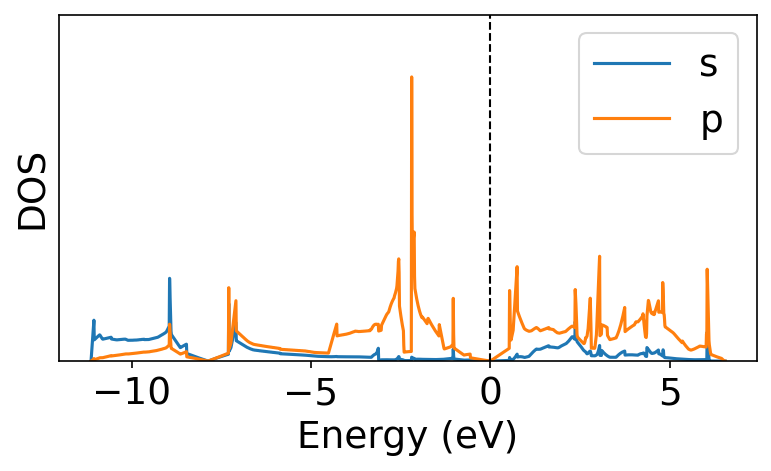

In [118]:
plt.figure(figsize=(6,3))
plt.ylim(0, 8)
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.plot(si_s['Energy'], (si_s['lDOS'] + si_s_2['lDOS']))
plt.plot(si_p['Energy'], (si_p['lDOS'] + si_p_2['lDOS']))
plt.legend(['s', 'p'])
plt.axvline(x=0, linewidth=1, ls='--', c='k') #plots contribution to pDOS of s vs p orbitals,
#combining data from both silicon atom of the unit cell

In [119]:
si_total = si_s['lDOS'] + si_p['lDOS'] #Calculates total pDOS for first silicon atom of unit cell 
si_total_2 = si_s_2['lDOS'] + si_p_2['lDOS'] #Calculates total pDOS for second silicon atom of unit cell 

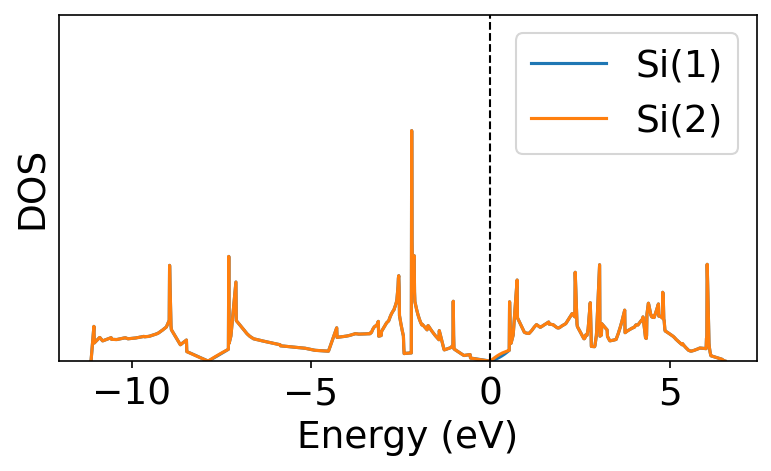

In [125]:
plt.figure(figsize=(6,3))
plt.ylim(0, 5)
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.plot(si_s['Energy'], si_total)
plt.plot(si_p['Energy'], si_total_2)
plt.legend(['Si(1)', 'Si(2)'])
plt.axvline(x=0, linewidth=1, ls='--', c='k') #plots total pDOS for first vs second silicon atom

The code for the plot below is configured to easily allow more orbital types to be plotted, e.g. for other systems with more different atom types or with different orbital subshells

In [121]:
DOS_total = si_s['lDOS'] + si_p['lDOS'] + si_s_2['lDOS'] + si_p_2['lDOS'] #calculates total pDOS, should match value
#imported from .dat.pdos_tot output file

In [104]:
break_points = 50 #number of line segments density of states curves are broken into
energy_split = np.array_split(si_s['Energy'], break_points)
DOS_total_split = np.array_split(DOS_total, break_points)
si_s_split = np.array_split((si_s['lDOS']+si_s_2['lDOS']), break_points)
si_p_split = np.array_split((si_p['lDOS']+si_p_2['lDOS']), break_points) #splits energy, total pDOS, and subshell 
#specific pDOS data

all_split = [] #contains all data for each orbital type for each line segment 
for i in range(break_points):
  all_split.append([])
  all_split[i].append(si_s_split[i])
  all_split[i].append(si_p_split[i])

In [123]:
means = np.zeros([break_points, 2]) #contains mean pDOS value for each orbital type for each line segment
for i in range(break_points):
  means[i][0] = np.mean(si_s_split[i])
  means[i][1] = np.mean(si_p_split[i])
means_indices = np.zeros([break_points, 2]) #array containing ordered list of means for each line segment
for i in range(break_points):
  dummy = np.argsort(means[i])
  for j in range(2):
    means_indices[i][j] = dummy[j]
# alphas = np.zeros([break_points, 4])
# for i in range(break_points):
#   alphas[i][int(means_indices[i][-1])] = 1

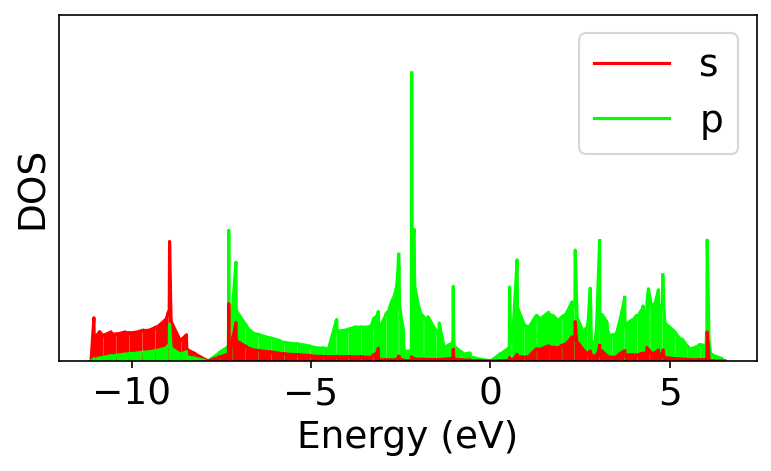

In [124]:
plt.figure(figsize=(6,3))
# plt.xlim(-4, 4)
plt.ylim(0, 8)
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
colors = [[1, 0, 0], [0, 1, 0]] #sets colours of different orbital types
for i in range(break_points): #loops over each line segment 
    index = int(means_indices[i][-1]) #index of orbital with biggest contribution to pDOS for a particular line segment
    index2 = int(means_indices[i][-2]) #index of orbital with 2nd biggest contribution to pDOS for a particular 
    #line segment
    plt.plot(energy_split[i], DOS_total_split[i], alpha=1, c=colors[index]) #plots total pDOS coloured by the 
    #orbital contributing largest to it 
    plt.plot(energy_split[i], (DOS_total_split[i]-all_split[i][index]), alpha=1, c=colors[index2]) #plots total pDOS
    #- largest contributing orbital, coloured by orbital contributing second most to it 
    plt.fill_between(energy_split[i], 0, DOS_total_split[i], alpha=1, fc=colors[index]) #colours area under 
    #total DOS plot by largest contributing orbital
    plt.fill_between(energy_split[i], 0, (DOS_total_split[i]-all_split[i][index]), alpha=1, fc=colors[index2]) #colours
    #area up to total pDOS - largest contribution by second largest contributing orbital
    if i < (break_points-1): #loops over each line segment, except for last one
      plt.plot([energy_split[i].iloc[-1], energy_split[i+1].iloc[0]], [DOS_total_split[i].iloc[-1], DOS_total_split[i+1].iloc[0]], alpha=1, c=colors[index]) #connects line segments
      plt.fill_between([energy_split[i].iloc[-1], energy_split[i+1].iloc[0]], 0, [DOS_total_split[i].iloc[-1], DOS_total_split[i+1].iloc[0]], alpha=1, fc=colors[index]) #fills in area between line segments
      plt.plot([energy_split[i].iloc[-1], energy_split[i+1].iloc[0]], [(DOS_total_split[i].iloc[-1]-all_split[i][index].iloc[-1]),\
                                                                       (DOS_total_split[i+1].iloc[0]-all_split[i+1][index].iloc[0])], alpha=1, c=colors[index2]) #connects line segments to second largest contribution pDOS line
      plt.fill_between([energy_split[i].iloc[-1], energy_split[i+1].iloc[0]], 0, [(DOS_total_split[i].iloc[-1]-all_split[i][index].iloc[-1]),\
                                                                       (DOS_total_split[i+1].iloc[0]-all_split[i+1][index].iloc[0])], alpha=1, fc=colors[index2]) #fills in area between line segments for second largest contribution to pDOS
plt.legend(['s', 'p'])
#plots total pDOS against energy, coloured at the top by largest contributing orbital type, below by second largest
#contributing type